**1. Розробити власну архітектуру GAN для датасету fashion mnist**

In [40]:
import tensorflow as tf
import numpy as np

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


In [41]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

def generator_model():
  model = tf.keras.Sequential([
    layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', input_shape=(100, 100, 1)),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(1, (3, 3), activation='tanh', padding='same'),
  ])
  return model

def discriminator_model():
  model = tf.keras.Sequential([
    layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 1)),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'),
    layers.LeakyReLU(alpha=0.2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
  ])
  return model

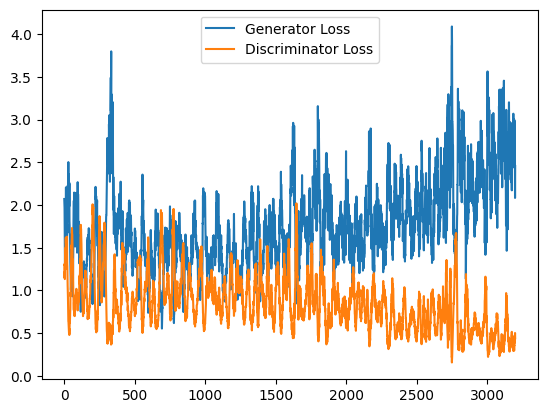

In [54]:
generator_losses = []
discriminator_losses = []

batch_size = 32
real_images = train_images[np.random.randint(0, len(train_images), size=batch_size)]

for epoch in range(100):
  for i in range(batch_size):
    noise = np.random.normal(0, 1, (batch_size, 100))

    generated_images = generator(noise)

    real_labels = tf.ones_like(discriminator(real_images))
    fake_labels = tf.zeros_like(discriminator(generated_images))

    with tf.GradientTape() as tape:
      real_output = discriminator(real_images)
      fake_output = discriminator(generated_images)
      real_loss = cross_entropy(real_labels, real_output)
      fake_loss = cross_entropy(fake_labels, fake_output)
      discriminator_loss = real_loss + fake_loss

    gradients = tape.gradient(discriminator_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))

    with tf.GradientTape() as tape:
      generated_images = generator(noise)
      fake_output = discriminator(generated_images)
      generator_loss = cross_entropy(real_labels, fake_output)

    gradients = tape.gradient(generator_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients, generator.trainable_variables))

    generator_losses.append(generator_loss.numpy())
    discriminator_losses.append(discriminator_loss.numpy())

import matplotlib.pyplot as plt

plt.plot(generator_losses, label='Generator Loss')
plt.plot(discriminator_losses, label='Discriminator Loss')
plt.legend()
plt.show()

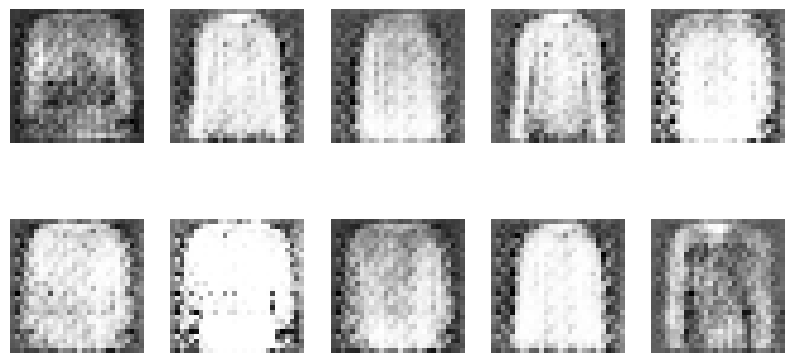

In [56]:
import numpy as np
import matplotlib.pyplot as plt

noise = np.random.normal(0, 1, (10, 100))
generated_images = generator(noise)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_images[i].numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

**2. Намалювати крижинку Коха з можливістю вибору рівня рекурсії.**

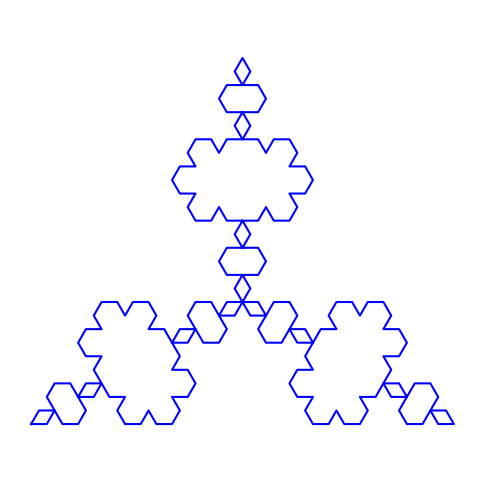

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def koch_curve(points, order):
    if order == 0:
        return points
    else:
        new_points = []
        for i in range(len(points) - 1):
            p1 = points[i]
            p2 = points[i + 1]
            dx = p2[0] - p1[0]
            dy = p2[1] - p1[1]
            distance = np.sqrt(dx ** 2 + dy ** 2)
            unit = distance / 3
            angle = np.arctan2(dy, dx)

            p3 = (p1[0] + np.cos(angle) * unit, p1[1] + np.sin(angle) * unit)
            p4 = (p3[0] + np.cos(angle + np.pi / 3) * unit, p3[1] + np.sin(angle + np.pi / 3) * unit)
            p5 = (p4[0] + np.cos(angle - np.pi / 3) * unit, p4[1] + np.sin(angle - np.pi / 3) * unit)
            new_points.extend([p1, p3, p4, p5])

        new_points.append(points[-1])
        return koch_curve(new_points, order - 1)

def draw_koch_snowflake(side_length, recursion_depth):
    points = [(0, 0), (side_length, 0), (side_length / 2, np.sqrt(3) * side_length / 2), (0, 0)]
    snowflake_points = koch_curve(points, recursion_depth)
    snowflake_x, snowflake_y = zip(*snowflake_points)
    plt.figure(figsize=(6, 6))
    plt.plot(snowflake_x, snowflake_y, 'b-')
    plt.axis('equal')
    plt.axis('off')
    plt.show()

side_length = 400
recursion_depth = 3

draw_koch_snowflake(side_length, recursion_depth)

**3. Намалювати килим Серпинського.**

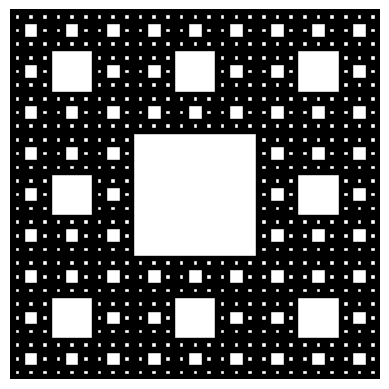

In [16]:
def draw_sierpinski_carpet(ax, x, y, size, depth):
    if depth > 0:
        for x_i in range(3):
            for y_i in range(3):
                if x_i != 1 or y_i != 1:
                    draw_sierpinski_carpet(ax,
                                            x + x_i * size / 3,
                                            y + y_i * size / 3,
                                            size / 3,
                                            depth - 1)
    else:
        ax.add_patch(plt.Rectangle((x, y), size, size, fill=True, color='black'))

def sierpinski_carpet(size, depth):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    draw_sierpinski_carpet(ax, 0, 0, size, depth)
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.axis('off')
    plt.show()

sierpinski_carpet(81, 4)